<div style="border:solid green 3px; padding: 20px">
<b>🥇 Борис, спасибо за доработки, проект принят, молодец!</b>
    
Будь, пожалуйста, в будущем более внимательным к советам и комметариям. Успехов в дальнейшем обучении! 🙂
    

Борис, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал большую работу :)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



--------------------

# Исследование сервиса аренды самокатов GoFast

В данном проекте нашей задачей является обработка 3 дата-фреймов от сервиса аренды самокатов, визуализировать данные, проверить наличие явных дубликатов и пропусков, доабавить новые столбцы, поменять тип данных, там где жто необходимо. Следующим шагом нужно оьъединить все дата-фреймы в один, посчитать выручку, проверить гипотезы и сделать общий вывод.

Цели проекта: 
-Выявить и ипсравить ошибки в данных
-Выявить какая категория пользователей приносит больше доход
-Выдвинуть и проверить несколько гипотез


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Правильно, что импортируешь все библиотеки в отдельной ячейке!  </div>

#### Шаг 1. Загрузка данных

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

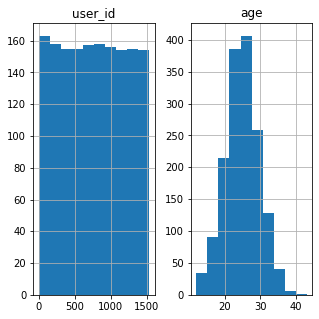

In [2]:

users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
display(users)
users.info()
users.hist(figsize=(5, 5))


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


array([[<AxesSubplot:title={'center':'minute_price'}>,
        <AxesSubplot:title={'center':'start_ride_price'}>],
       [<AxesSubplot:title={'center':'subscription_fee'}>,
        <AxesSubplot:>]], dtype=object)

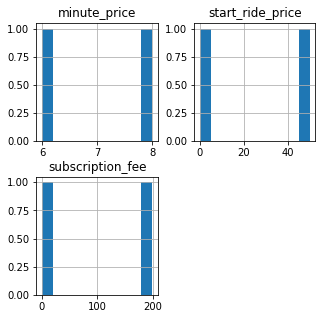

In [3]:
display(subscriptions.head())
subscriptions.hist(figsize=(5, 5))

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 
    
Выводить датафрейм (или его части) на экран лучше в табличном виде (без использования функции `print()`), так будет гораздо понятнее и нагляднее. Можно использовать функцию `display()`. 

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

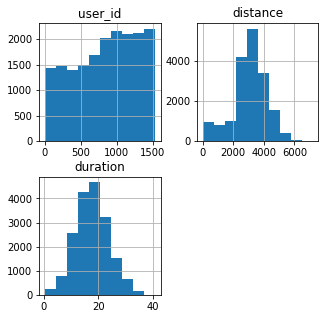

In [4]:
display(rides.head())
rides.info()
rides.hist(figsize=(5, 5))

Данные расперделены нормально, аномалий не вижу. Предварительно средняя дистанция поездки находится в пределах от 2000 до 4000 метров. Средняя врмея поездки находится около 20 минут. С тарифами все сильно проще - существует всего два тарифа

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 3:</b>

Также стоит отметить объем и полноту данных, корректность наименования столбцов и соответствие типов данных.</div>

#### Шаг 2. Предобработка данных

In [5]:
rides['date'] = pd.to_datetime(rides['date'],format = '%Y-%m-%d')

rides['month'] = rides['date'].apply(lambda x: x.month)

print(rides['date'].min())
print(rides['date'].max())


2021-01-01 00:00:00
2021-12-30 00:00:00


все данные только за 2021 год, значит всего будет 12 месяцев

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Дополнительно лучше проверить данные за какой период у нас имеются, чтобы в дальнейшем не допустить ошибок при группировке по месяцам.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

In [6]:
rides.value_counts()


user_id  distance     duration   date        month
1        748.690645   15.041884  2021-11-22  11       1
1105     3232.037291  19.120140  2021-02-24  2        1
         4661.122393  21.159450  2021-03-25  3        1
         4468.509613  12.937019  2021-11-28  11       1
         4057.692285  21.695055  2021-06-05  6        1
                                                     ..
645      4040.109793  17.100274  2021-11-26  11       1
646      2635.251399  11.081349  2021-09-06  9        1
         2853.140708  23.699278  2021-01-28  1        1
         3442.376310  22.753041  2021-03-17  3        1
1534     4928.173852  22.560373  2021-09-13  9        1
Length: 18068, dtype: int64

In [7]:
rides.isna().sum()


user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [8]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 
    
Код стоит разделять на отдельные ячейки. Как в выведенной на экран информации понять что какие строки означают?
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Пропущенных значений не наблюдаю,данные система считала самостоятельно

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [9]:
print(subscriptions.value_counts())
print(subscriptions.isna().sum())
print(subscriptions.duplicated(subset=None).count())
subscriptions


subscription_type  minute_price  start_ride_price  subscription_fee
free               8             50                0                   1
ultra              6             0                 199                 1
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
2


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


данные автоматически собраны, проблем не вижу, всего 2 тарифа и цены зависят от них

In [10]:
users['user_id'].value_counts()
users = users.drop_duplicates(subset=['user_id'], keep='first')
print(users['user_id'].value_counts())
print(users.isna().sum())
print(subscriptions.duplicated(subset=None).sum())
users

1       1
1020    1
1029    1
1028    1
1027    1
       ..
510     1
509     1
508     1
507     1
1534    1
Name: user_id, Length: 1534, dtype: int64
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
0


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


Удалили дубликаты в user_id

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Данные хорошие, какие-то из них заполняли пользователи, какие-то считала система. Дубликатов в данном случае прилично, много раз повторяются имена, города, возраст, но это не ошибка, все пользователи имеют уникальный user_id


на этапе предобработки данных была проделена следуюшая работа:
-Проверка на пропуски
-Проверка на дубликаты
-Удаление дубликатов

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 
    
Необходимо отметить, какая работа была проделана на этапе предобработки данных.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

#### Шаг 3. Исследовательский анализ данных

Text(0.5, 1.0, 'встречаемость городов')

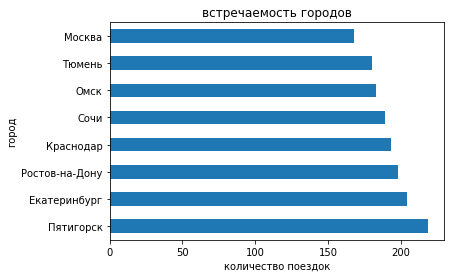

In [11]:
users['city'].value_counts().plot.barh()
plt.xlabel('количество поездок',)
plt.ylabel('город')
plt.title('встречаемость городов')


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 5:</b> Отлично, исправлено!👍  </div>

UPD: все названия графиков теперь тоже подписаны

Самый частовсречаемый город - Пятигорск, самый невстречаемый - Москва

54.43285528031291
45.56714471968709
0.837125748502994


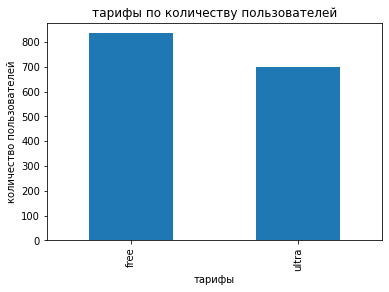

In [12]:
len1 = users[users['subscription_type'] == 'ultra']
len2 = users[users['subscription_type'] == 'free']
print(len2.shape[0]/users.shape[0]*100)
print(len1.shape[0]/users.shape[0]*100)
print(len1.shape[0]/len2.shape[0])

freqs = users['subscription_type'].value_counts()
ax = freqs.plot.bar()
plt.xlabel('тарифы')
plt.ylabel('количество пользователей')
plt.title('тарифы по количеству пользователей')
plt.show()




<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

Тут все-таки отлично подошла бы круговая диаграмма с отображением на ней соотношения групп пользователей в %</div>

54% пользователя имеют подписку, а 46% пользователей нет
соотношение пользовалетей с подпиской к пользователем без = 0.85

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


Text(0, 0.5, 'количество пользователей')

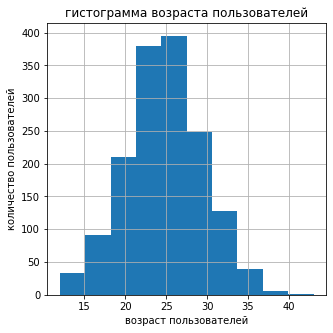

In [13]:
print(users['age'].describe())
users['age'].hist(figsize=(5, 5))
plt.title('гистограмма возраста пользователей')
plt.xlabel('возраст пользователей',)
plt.ylabel('количество пользователей')


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

В качестве дополнительного инструмента для анализа можно использовать `describe()`</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

самый часто-встречаемый возраст у пользователей это от 22 до 27 лет
среднее по возрасту - 24 года

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


Text(0.5, 1.0, 'гистограмма дистанции поездок')

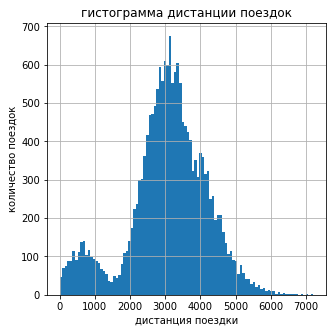

In [14]:
print(rides['distance'].describe())
rides['distance'].hist(bins=100,figsize=(5, 5))
plt.xlabel('дистанция поездки')
plt.ylabel('количество поездок')
plt.title('гистограмма дистанции поездок')

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

Как ты думаешь, чем можно объяснить два пиковых значения на распределении?</div>

разные типы поездок, разные типы
например, на первой люди ездят возможно до метро, либо к них плохо получается и они завершают аренду, а на второй просто катаются

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍 Согласен </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Стоит увеличить значение параметра bins для более точного построения распределения.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Самые частые поездки по расстоянию находятся в диапазоне от 2800 до 3500 метров
средняя поездка - 3070м

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


Text(0.5, 1.0, 'гистограмма продолжительности поездок')

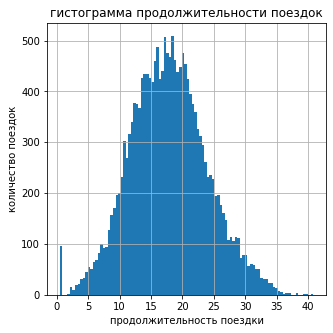

In [15]:
rides['duration'].hist(bins=100,figsize=(5, 5))
print(rides['duration'].describe())
plt.xlabel('продолжительность поездки',)
plt.ylabel('количество поездок')
plt.title('гистограмма продолжительности поездок')

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Давай все-таки увеличим значение параметра bins. Тогда мы сможем заметить странный пик около 0. Строки с этими поездками и их параметры стоит рассмотреть подробнее на предмет аномалий.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Больше всего поездок длились от 13 до 21 минуты
увеличив количество bins мы действительно можем заметить старнный пик на значениях 1 минута, это говорит о том, что пользователь на старте передумал ехать на самокате

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

Следует все-таки посмотреть на эти поездки подробнее.</div>

Методом describe получили среднее значение в 17.8
первым и третьем квартилем подтвердили основноый диапазон значений: 13.6 и 21.7

#### Шаг 4. Объединение данных

In [16]:
df = users.merge(rides, on='user_id')
data = df.merge(subscriptions, on='subscription_type')
data_sub = data[data['subscription_type'] == 'ultra']
data_without_sub = data[data['subscription_type'] == 'free']
data.dtypes
print(len(users))
print(len(rides))
print(len(data))
data

1534
18068
18068


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Количество строк осталось прежним, мы счиатем итоговый датафрейм Data по количеству строк ride, лишнего не прибавили

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Text(0.5, 1.0, 'длительность поездок с подпиской и без')

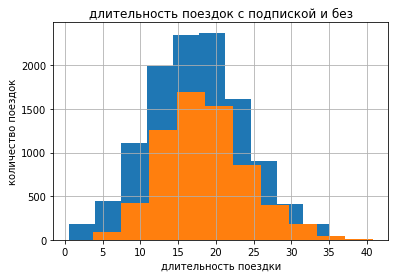

In [17]:
data_without_sub['duration'].hist()
data_sub['duration'].hist()
plt.xlabel('длительность поездки')
plt.ylabel('количество поездок')
plt.title('длительность поездок с подпиской и без')

Text(0.5, 1.0, 'дистанция поездок с подпиской и без')

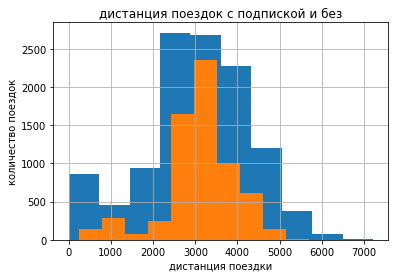

In [18]:

data_without_sub['distance'].hist()  
data_sub['distance'].hist()  
plt.xlabel('дистанция поездки')
plt.ylabel('количество поездок')
plt.title('дистанция поездок с подпиской и без')

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 

У этих распределений тоже следует увеличить значение параметра bins</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Распределения для обеих групп пользователей можно объединить для наглядности, наложив их друг на друга.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Поездки с подпиской длиннее, чем без
поездки с подпиской дольше, чем без, но разница совсем не большая

#### Шаг 5. Подсчёт выручки

In [19]:

data['duration'] = np.ceil(data['duration']) 
data_grouped = data.groupby(['user_id', 'month'])['duration','distance'].sum()
data_grouped['amount'] = data.pivot_table(index=('user_id','month'), values='distance', aggfunc='count')
data_group = data.pivot_table(index='user_id', values=('subscription_type','minute_price','start_ride_price','subscription_fee'),aggfunc='first')
data_grouped = data_grouped.merge(data_group,on='user_id')
data_grouped

/tmp/ipykernel_230/2952385532.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_grouped = data.groupby(['user_id', 'month'])['duration','distance'].sum()


,duration,distance,amount,minute_price,start_ride_price,subscription_fee,subscription_type
user_id,,,,,,,
1,42.0,7027.511294,2,6,0,199,ultra
1,7.0,754.159807,1,6,0,199,ultra
1,46.0,6723.470560,2,6,0,199,ultra
1,32.0,5809.911100,2,6,0,199,ultra
1,56.0,7003.499363,3,6,0,199,ultra
...,...,...,...,...,...,...,...
1534,26.0,3409.468534,2,8,50,0,free
1534,48.0,7622.453034,2,8,50,0,free
1534,23.0,4928.173852,1,8,50,0,free


сгруппировали данные по месяцу и пользователю, посчитали сумму времени и дистнации для каждого пользователя

In [20]:

data_grouped['money_from_user'] = data_grouped['start_ride_price'] * data_grouped['amount'] + data_grouped['duration'] * data_grouped['minute_price'] + data_grouped['subscription_fee']
data_grouped

,duration,distance,amount,minute_price,start_ride_price,subscription_fee,subscription_type,money_from_user
user_id,,,,,,,,
1,42.0,7027.511294,2,6,0,199,ultra,451.0
1,7.0,754.159807,1,6,0,199,ultra,241.0
1,46.0,6723.470560,2,6,0,199,ultra,475.0
1,32.0,5809.911100,2,6,0,199,ultra,391.0
1,56.0,7003.499363,3,6,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...
1534,26.0,3409.468534,2,8,50,0,free,308.0
1534,48.0,7622.453034,2,8,50,0,free,484.0
1534,23.0,4928.173852,1,8,50,0,free,234.0


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Выручка рассчитана верно👍  </div>

Посчитали полученные деньги от пользователей помесячно

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

#### Шаг 6. Проверка гипотез

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Нулевая гипотеза: Пользователи с подпиской и без тратят одинаково времени на поездки. 
Альтернативная гипотеза - Пользователи с подпиской тратят больше времени на поездку 

Установим уровень статистической значимости alpha 0.05, если p-value будет меньше чем alpha - значит нулевая гипотеза не подтвердится и будет принята альтернативная




<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

Обработал комментарий, теперь нулевая гипотеза = равенство

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

 исправлено

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

обработан

In [21]:
print(data_sub['duration'].describe())
print(data_without_sub['duration'].describe())

alpha = 0.05

results = st.ttest_ind(data_sub['duration'],data_without_sub['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Подтверждаем нулевую гипотезу') 


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64
count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64
p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Нулевая гипотеза о равентсве не подтверлась, а альтернативная да

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза - среднее расстояние за одну поездку больше 3130 метров

Альтернативная гипотеза - среднее расстояние за одну поездку меньше 3130 метров 

Установим уровень статистической значимости alpha 0.05, если p-value будет меньше чем, alpha значит нулевая гипотеза не подтвердится, и будет принята альтернативная



<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 3:</b> 
    
Тут тоже необходимо сформулировать нулевую  и альтернативную гипотезы.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

In [22]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(data_sub['distance'], interested_value, alternative = 'greater')

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Подтверждаем нулевую гипотезу') 
    
print(data_sub['distance'].median())
    

p-значение: 0.9195368847849785
Подтверждаем нулевую гипотезу
3148.6372291760854


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

Нулевая гипотеза подтвердилась, альернативная - нет

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 8:</b> 
    
В выводах всегда должен содержаться явный ответ на поставленный в задании вопрос. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?     </div>

Исправлено

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая гипотеза формулируется на основании равенства по аналогии с 6.1, 
Нулевая гипотеза - Помесячные вырукчи пользователей с подпиской и без равны
Альтернативная гипотеза - Помесячные вырукча от пользователей с подпиской по месяцам выше

Установим уровень статистической значимости alpha 0.05, если p-value будет меньше чем, alpha значит нулевая гипотеза не подтвердится, и будет принята альтернативная



<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

In [23]:
data_grouped_sub = data_grouped[data_grouped['subscription_type']=='ultra']
data_grouped_sub['money_from_user'].describe()
data_grouped_sub 

,duration,distance,amount,minute_price,start_ride_price,subscription_fee,subscription_type,money_from_user
user_id,,,,,,,,
1,42.0,7027.511294,2,6,0,199,ultra,451.0
1,7.0,754.159807,1,6,0,199,ultra,241.0
1,46.0,6723.470560,2,6,0,199,ultra,475.0
1,32.0,5809.911100,2,6,0,199,ultra,391.0
1,56.0,7003.499363,3,6,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...
699,17.0,4072.797406,1,6,0,199,ultra,301.0
699,45.0,7018.324143,2,6,0,199,ultra,469.0
699,31.0,6364.861911,2,6,0,199,ultra,385.0


In [24]:

data_grouped_without_sub = data_grouped[data_grouped['subscription_type']=='free']
data_grouped_without_sub['money_from_user'].describe()
data_grouped_without_sub 

,duration,distance,amount,minute_price,start_ride_price,subscription_fee,subscription_type,money_from_user
user_id,,,,,,,,
700,15.0,2515.690719,1,8,50,0,free,170.0
700,89.0,13446.659764,5,8,50,0,free,962.0
700,19.0,3798.334905,1,8,50,0,free,202.0
700,16.0,2984.551206,1,8,50,0,free,178.0
700,29.0,5927.650988,2,8,50,0,free,332.0
...,...,...,...,...,...,...,...,...
1534,26.0,3409.468534,2,8,50,0,free,308.0
1534,48.0,7622.453034,2,8,50,0,free,484.0
1534,23.0,4928.173852,1,8,50,0,free,234.0


In [25]:
alpha = 0.05

results = st.ttest_ind(data_grouped_sub['money_from_user'],data_grouped_without_sub['money_from_user'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

Нулевая гипотеза не подтвердилась, помесячная выручка от пользователей с подпиской выше, чем без

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?


In [26]:
before = [152,154,160,130]

after =  [153,157,148,170]

results = st.ttest_rel(before, after, alternative = 'less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2628408443109411
Не получилось отвергнуть нулевую гипотезу


Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, нужон будет применить метод scipy.stats.ttest_rel()

Выше привел прмиер кода, данные придуманы, чтобы показать нужный метод 

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 3:</b>

Метод выбран верный

Но обрати внимание, что гипотеза тоже односторонняя, поэтому необходимо указывать значение для параметра alternative.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 6:</b> Отлично, исправлено!👍  </div>

#### Шаг 7. Распределения

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Все библиотеки лучше импортировать в самом начале проекта, в отдельной ячейке. Если в процессе работы появилась необходимость добавить библиотеку, то ее можно дописать в эту ячейку и исполнить.</div>

<BarContainer object of 1001 artists>

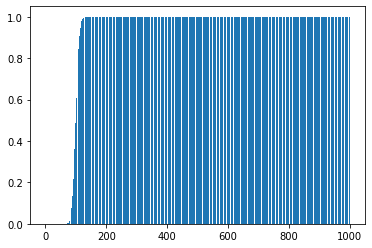

In [27]:
from matplotlib import pyplot as pltl
from scipy.stats import binom

n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.cdf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)

через binom.cdf() получили следующее

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 3:</b> 
    

Сколько промокодов потребуется и какая будет вероятность невыполнения плана?

P.S. метод binom.cdf() нам как раз и считает эту вероятность.</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    

Дело в том, что ты считаешь факториал от числа 2000, потом делишь его еще на произведение факториалов, в результате получается очень большое число, которое не умещается в тип данных float.
    
В этом задании стоит использовать биномиальное распределение, подбирая подходящее значение параметра n (количество промокодов) в цикле для заданного параметра p = 0.1 (вероятность успеха) с помощью метода binom.cdf()  и сравнивая результат с заданной вероятностью невыполнить план.</div>

In [28]:
from math import sqrt
from scipy import stats as st

# задаём параметры биномиального распределения
n = 1000000
p = 0.4


# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 43 тысяч
result = distr.cdf(399500)
print(result)



0.15371708296369768


Вероятность получить меньше 399.5 тыс открытиый баннерра равна 15.3%

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Тут результат верный.</div>

ОБЩИЙ ВЫВОД:

В данном проекте мы обработали 3 дата-фреймов от сервиса аренды самокатов, визуализировали данные, проверяли наличие явных дубликатов и пропусков, доабавили новые столбцы, поменяли тип данных, там где это необходимо. 
После объединили все дата-фреймы в один, сгруппировали данные из него, посчитали данные по месяцам, далее сформлировали и проверили 4 нулевых гипотезы

Главные выводы:
-Пользователи с подпиской являются более выгодными для данного сервиса аренды самокатов, они больше тратят денег в месяц, но их как группа меньше, чем тех, кто без подписки
-средняя поездка пользователей составляет 3145 метров, что почти укладывается в оптимальные 3130


Аналитические выводы: 

54% пользователя имеют подписку, а 46% пользователей нет
Самый встречаемые город - Пятигорск, самый невстречаемый - Москва
основная масса пользователей находится в промежутке от 22 до 27 лет, на этом можно основывать ЦА под маркетинг


Рекомендации:
Я могу посоветовать ранжировать стоимость поездки в зависимосии от городов, а также развивать программу привлечения месячных подписок, данная категоряи людей выгоднее для сервиса, потому что фиксированно 199 рублей, как минимум, мы получим всегда

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 3:</b>

Не хватает результатов по исследовательскому анализу.

**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>